# Data Analysis assignment on 'Sales transaction' data

Importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno

%matplotlib inline

Reading data from the excel file:

In [2]:
df = pd.read_excel('sales_data.xlsx')
df.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

Our DataFrame has 541909 rows and 8 columns

# I) Data Cleaning

### 1. Organizing data

Renaming the columns for better convenience and analysis:

In [3]:
df.rename(index=str, columns={'transaction id': 't_id',
                              'product id': 'product_id',
                              'product description': 'description',
                              'quantity sold': 'quantity',
                              'transaction timestamp': 'timestamp',
                              'unit price': 'unit_price',
                              'customer id': 'cust_id',
                              'transaction country': 'country'}, inplace=True)
df.head()

,t_id,product_id,description,quantity,timestamp,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 2. Checking for  missing values

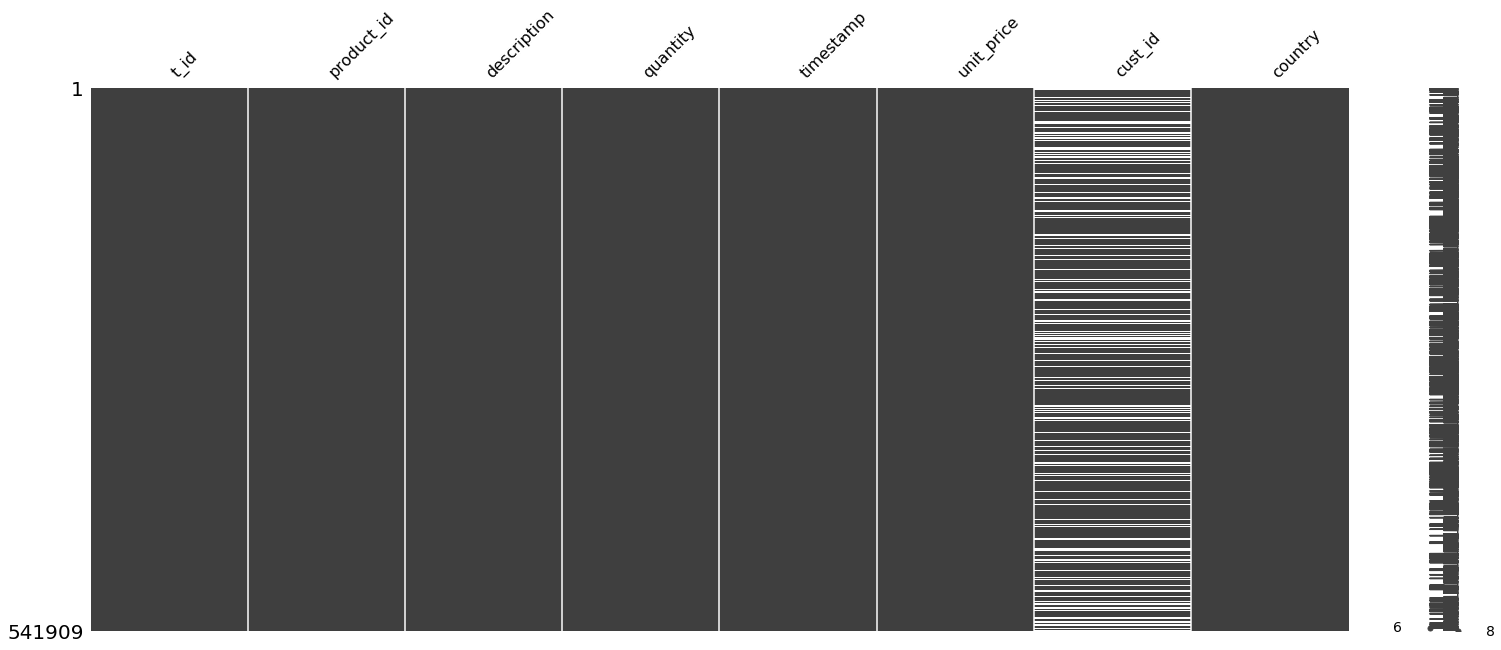

In [5]:
msno.matrix(df)

It is clear from the above plot that 'cust_id' has a lot of missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
t_id           541909 non-null object
product_id     541909 non-null object
description    540455 non-null object
quantity       541909 non-null int64
timestamp      541909 non-null datetime64[ns]
unit_price     541909 non-null float64
cust_id        406829 non-null float64
country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


From the above information, it is even more clear that 'cust_id' has a lot of missing data. It has only 406829 non-null entries out of 541909 entries. We can also see that 'description' column has a few missing values. 

In [8]:
# Checking number of missing values at each column
df.isnull().sum().sort_values(ascending=False)

cust_id        135080
description      1454
country             0
unit_price          0
timestamp           0
quantity            0
product_id          0
t_id                0
dtype: int64

It's now clear that 'cust_id' has 135080 missing values and 'description' has 1454 missing values. All the other columns contain non-null values

In [9]:
# Checking the rows with missing values
df[df.isnull().any(axis=1)].head()

,t_id,product_id,description,quantity,timestamp,unit_price,cust_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


### 3. Removing rows with missing values

In [10]:
df = df.dropna()
df.isnull().sum().sort_values(ascending=False)

country        0
cust_id        0
unit_price     0
timestamp      0
quantity       0
description    0
product_id     0
t_id           0
dtype: int64

All our columns are now free from missing values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
t_id           406829 non-null object
product_id     406829 non-null object
description    406829 non-null object
quantity       406829 non-null int64
timestamp      406829 non-null datetime64[ns]
unit_price     406829 non-null float64
cust_id        406829 non-null float64
country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


After removing the rows containing missing values, we now have 406829 rows.

### 4. Check for negative values

In [12]:
df.describe()

,quantity,unit_price,cust_id
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


We see that 'quantity' has a min value of -80995 which is negative. So, we have to remove 'quantity' with negative values

In [13]:
df = df[df.quantity > 0]
df.describe()

,quantity,unit_price,cust_id
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


The 'quantity' column now contains only positive values.

### 5. Make other necessary changes 

In [14]:
df['timestamp'] = pd.to_datetime(df.timestamp, format='%m/%d/%Y %H:%M')
df['description'] = df.description.str.lower()
df['cust_id'] = df['cust_id'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
t_id           397924 non-null object
product_id     397924 non-null object
description    397924 non-null object
quantity       397924 non-null int64
timestamp      397924 non-null datetime64[ns]
unit_price     397924 non-null float64
cust_id        397924 non-null int64
country        397924 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


### 6. Add any columns if necessary 

In [15]:
df['amount_spent'] = df['quantity'] * df['unit_price']
df.head()

,t_id,product_id,description,quantity,timestamp,unit_price,cust_id,country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


I'm now going to rearrange the columns for easy reference

In [16]:
df = df[['t_id', 'timestamp', 'product_id', 'description', 'quantity', 'unit_price', 'amount_spent', 'cust_id', 'country']]
df.head()

,t_id,timestamp,product_id,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


# II) Exploratory Data Analysis

### 1. a) How many orders were placed by the customers?

In [17]:
df.groupby(['cust_id', 'country'], as_index=False)['t_id'].count().head(10)

,cust_id,country,t_id
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
5,12352,Norway,85
6,12353,Bahrain,4
7,12354,Spain,58
8,12355,Bahrain,13
9,12356,Portugal,59


From the above table, we can know that a customer with 'cust_id' 12346, living in United Kingdom, has made one transaction/ order. Similarly, a customer with 'cust_id' 12347, living in Iceland, has made 182 transactions (or has placed 182 orders) and so on.

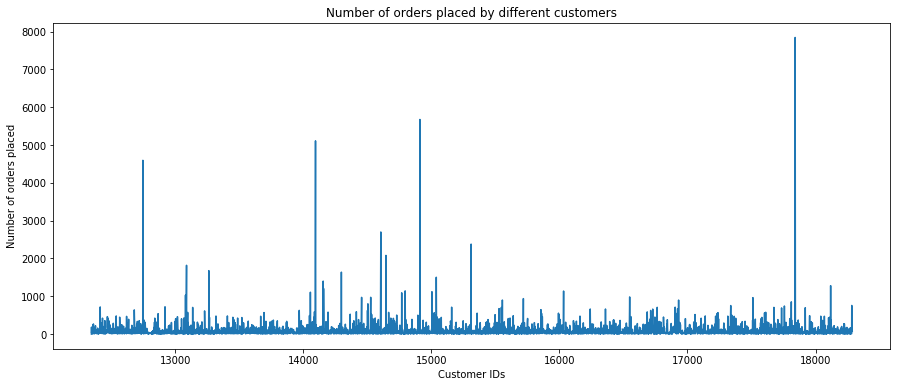

In [19]:
most_orders = df.groupby(['cust_id', 'country'], as_index=False)['t_id'].count()

plt.subplots(figsize=(15,6))
plt.plot(most_orders.cust_id, most_orders.t_id)
plt.xlabel("Customer IDs")
plt.ylabel("Number of orders placed")
plt.title("Number of orders placed by different customers")
plt.show()

### 1. b) Give the top 5 customers with maximum orders 

In [20]:
print("The top 5 customers with maximum orders: ")
most_orders.sort_values(by='t_id', ascending=False).head()

The top 5 customers with maximum orders: 


,cust_id,country,t_id
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


Therefore, the customer with maximum number of orders is 17841 living in United Kingdom with the number of orders placed = 7847

### 2. a) What is the amount of money spent by the customers on their order? 

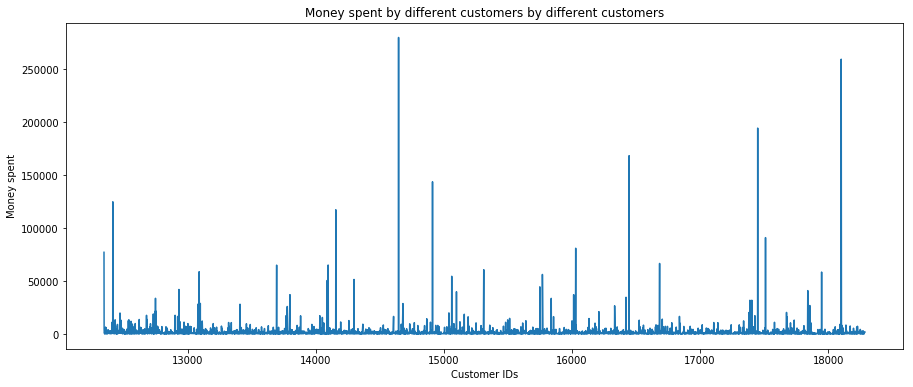

In [21]:
money_spent = df.groupby(by=['cust_id', 'country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel("Customer IDs")
plt.ylabel("Money spent")
plt.title("Money spent by different customers by different customers")
plt.show()

In [22]:
money_spent.head()

,cust_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40


### 2. b) Name the top 5 customers who've spent the most. 

In [23]:
print("Top 5 customers who've spent the most:")
money_spent.sort_values(by='amount_spent', ascending=False).head()

Top 5 customers who've spent the most:


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


Therefore, customer with 'cust_id' 14646, from Netherlands, spent a total of 280206.02 on purchases from the company.

### 3. Which were the countries with maximum orders/ transactions? 

In [25]:
df.groupby('country', as_index=False)['quantity'].count().head(10)

,country,quantity
0,Australia,1185
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32
5,Canada,151
6,Channel Islands,748
7,Cyprus,614
8,Czech Republic,25
9,Denmark,380


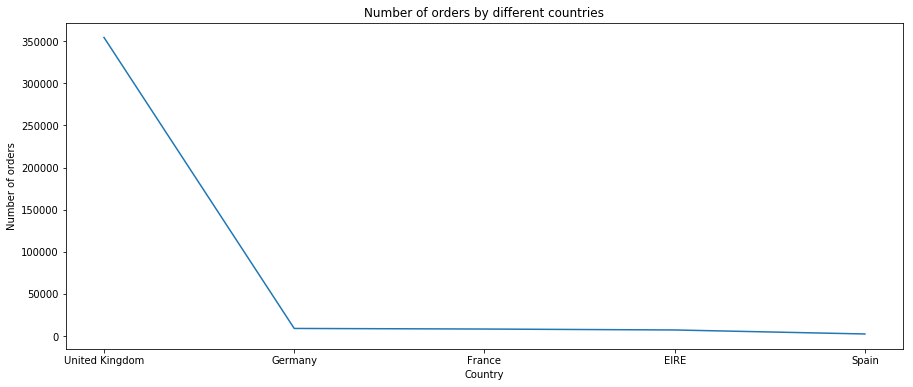

In [24]:
most_country_orders = df.groupby('country', as_index=False)['quantity'].count().sort_values(by='quantity', ascending=False).head(5)

plt.subplots(figsize=(15,6))
plt.plot(most_country_orders.country, most_country_orders.quantity)
plt.xlabel("Country")
plt.ylabel("Number of orders")
plt.title("Number of orders by different countries")
plt.show()

The graph shows the top 5 countries with most orders.

In [26]:
print("Top 5 countries with most orders:")
df.groupby('country', as_index=False)['quantity'].count().sort_values(by='quantity', ascending=False).head(5)

Top 5 countries with most orders:


,country,quantity
35,United Kingdom,354345
14,Germany,9042
13,France,8342
10,EIRE,7238
30,Spain,2485


It is clear that United Kingdom beat all other countries by a massive number of orders. 

### 4. What is the total revenue per country? 

C:\Users\Nalina Vadmal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


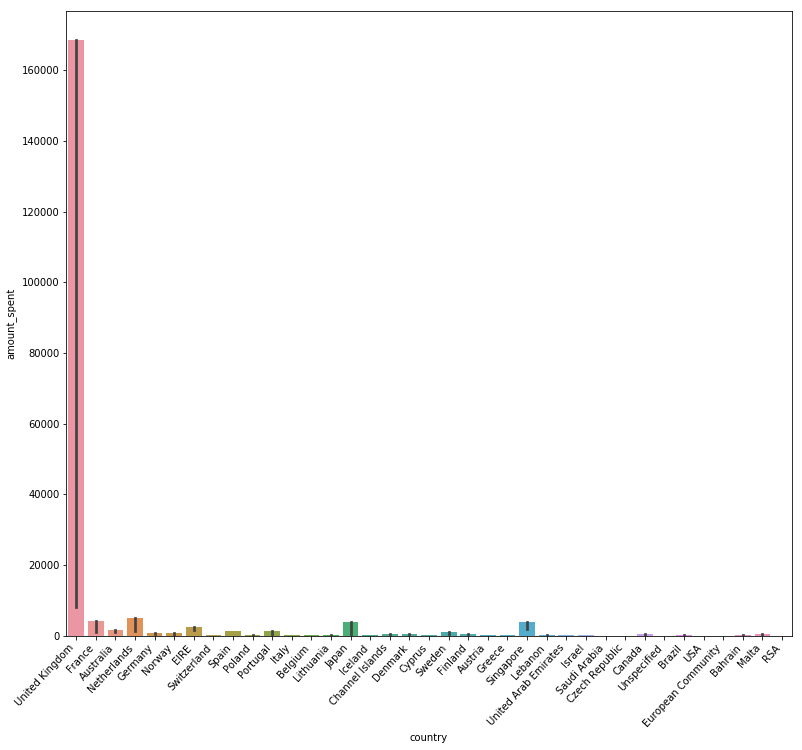

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax = sns.barplot(x='country', y='amount_spent', data=df, estimator=max, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [28]:
df.groupby('country')['amount_spent'].sum().sort_values(ascending=False)

country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

As we can see, the largest market is the one located in UK.

In [29]:
df[df['country']=='United Kingdom']['cust_id'].nunique()

3921

So we can conclude, not only most sales revenues are achieved in the UK, but also most customers are located there too.

In [30]:
uk = df[df['country']=='United Kingdom']
print("Number of transactions: ", uk['t_id'].nunique())
print("Number of products bought: ", uk['product_id'].nunique())
print("Number of customers: ", uk['cust_id'].nunique())

Number of transactions:  16649
Number of products bought:  3645
Number of customers:  3921


### 5. Which are the products that are most brought in UK? 

In [31]:
uk_prod = uk.groupby(['product_id','description'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)
uk_prod.head()

,product_id,description,quantity
2514,23843,"paper craft , little birdie",80995
2016,23166,medium ceramic top storage jar,76919
2690,84077,world war 2 gliders asstd designs,49182
3548,85099B,jumbo bag red retrospot,41981
3555,85123A,white hanging heart t-light holder,34648


We can see that, the product with 'product_id' was most brought in UK. The reason UK was chosen is because UK has achieved the most sales revenue.

To find the least brought products:

In [32]:
uk_prod.tail()

,product_id,description,quantity
796,21895,potting shed sow 'n' grow set,1
3162,47503J,set/3 floral garden tools in bag,1
2921,90071,ruby glass cluster earrings,1
3706,90065B,black vint art dec crystal bracelet,1
760,21839,mummy mouse red gingham ribbon,1


### 6. What is the frequency of orders by month? 

We first need to add the year, month, day and hour for the 'timestamp'

In [33]:
df.insert(loc=2, column='year_month', value=df['timestamp'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='month', value=df.timestamp.dt.month)
df.insert(loc=4, column='day', value=(df.timestamp.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=(df.timestamp.dt.hour))
df.head()

,t_id,timestamp,year_month,month,day,hour,product_id,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


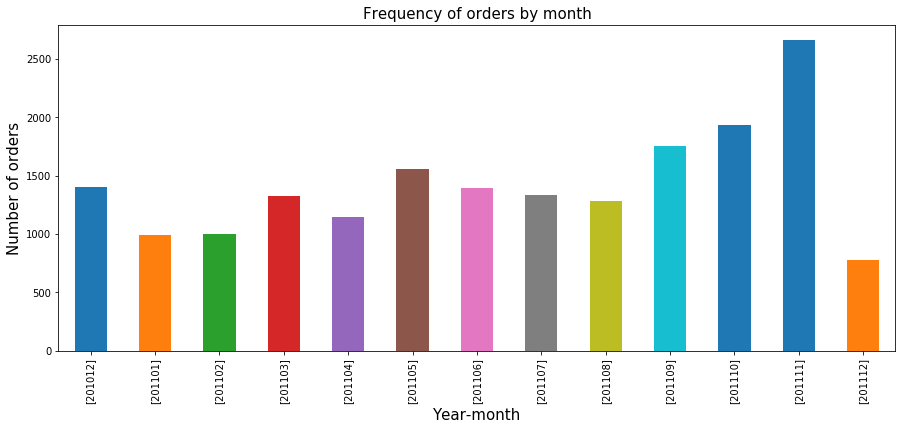

In [34]:
# Finding the frequency of orders by month
plt.figure(figsize=(15,6))
plt.title("Frequency of orders by month", fontsize=15)
transaction_date = df.groupby(['t_id'])['year_month'].unique() 
ax = transaction_date.value_counts().sort_index().plot.bar()
ax.set_xlabel('Year-month', fontsize=15)
ax.set_ylabel('Number of orders', fontsize=15)
plt.show()

As we can see, November 2011 saw the maximum placed orders, followed by October and September 2011.

### 7. Find the day of the week with maximum placed orders. 

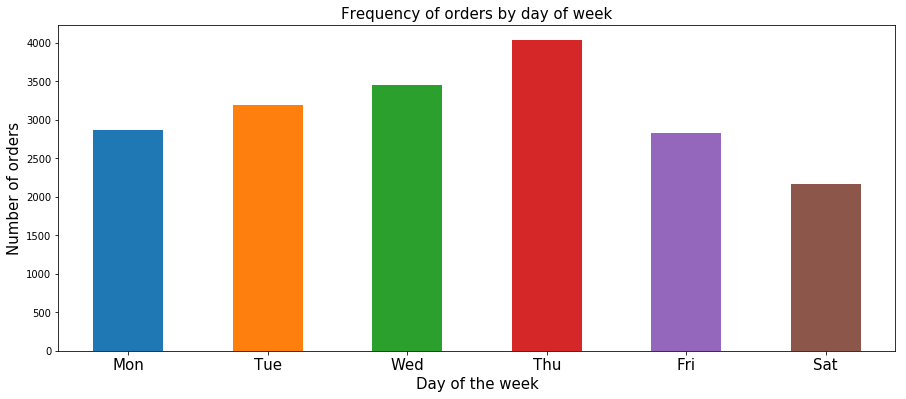

In [35]:
#Frequency of orders by day of the week
plt.figure(figsize=(15,6))
plt.title("Frequency of orders by day of week", fontsize=15)
ax = df.groupby(['t_id'])['day'].unique().value_counts().sort_index().plot.bar()
ax.set_xlabel('Day of the week', fontsize=15)
ax.set_ylabel('Number of orders', fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat'), fontsize=15, rotation='horizontal')
plt.show()

As we can see, maximum orders were placed on Thursdays.

### 8. Find the time of the day when maximum orders were placed

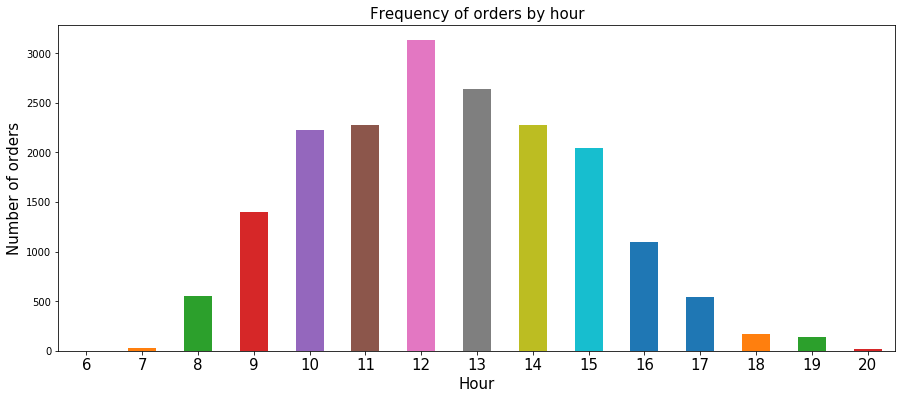

In [36]:
#Frequency of orders by hour
plt.figure(figsize=(15,6))
plt.title("Frequency of orders by hour", fontsize=15)
ax = df.groupby('t_id')['hour'].unique().value_counts().iloc[:-1].sort_index().plot.bar()
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of orders', fontsize=15)
ax.set_xticklabels(range(6,21), fontsize=15, rotation='horizontal')
plt.show()

Most of the orders were placed at 12'o'clock in the afternoon

### 9. Compare the frequencies of day of week VS hour of day 

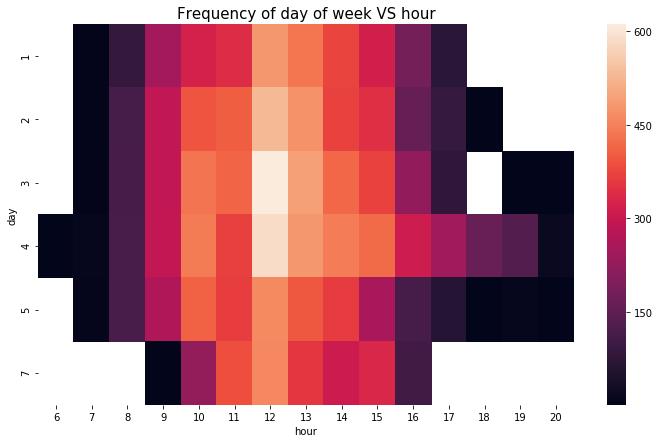

In [37]:
#Frequency of day of the week VS hour of day
grouped_df = df.groupby(['day','hour'])['t_id'].unique().reset_index()
grouped_df['t_id'] = grouped_df['t_id'].apply(len)
grouped_df = grouped_df.pivot('day','hour','t_id')
plt.figure(figsize=(12,7))
sns.heatmap(grouped_df)
plt.title('Frequency of day of week VS hour', fontsize=15)
plt.show()

### 10. Find the sales of company by month. (OR) Analyze the performance of company

In [38]:
df.groupby('year_month')['amount_spent'].sum().sort_index()

year_month
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: amount_spent, dtype: float64

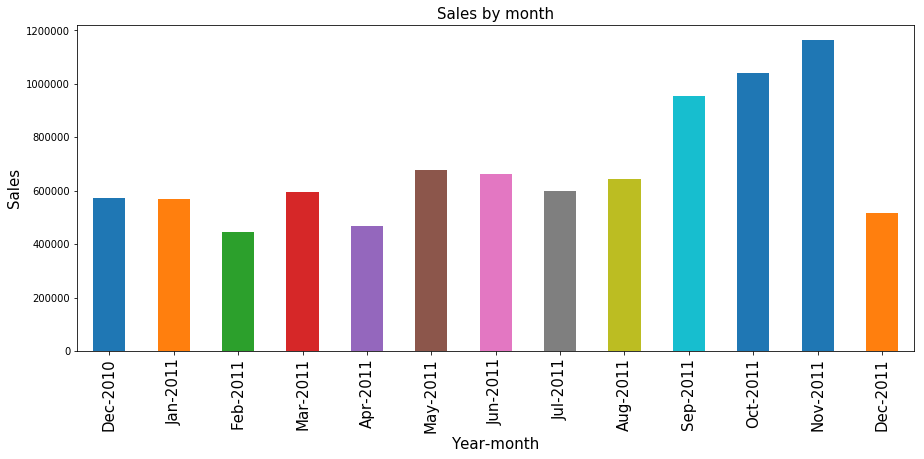

In [39]:
#Frequency of orders by month
plt.figure(figsize=(15,6))
plt.title("Sales by month", fontsize=15)
transaction_date = df.groupby('year_month')['amount_spent'].sum() 
ax = transaction_date.sort_index().plot.bar()
ax.set_xlabel('Year-month', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
ax.set_xticklabels(('Dec-2010','Jan-2011','Feb-2011','Mar-2011','Apr-2011','May-2011', 'Jun-2011','Jul-2011',
                    'Aug-2011','Sep-2011','Oct-2011','Nov-2011','Dec-2011'), fontsize=15)
plt.show()

Here, the performance of the company is measured by taking 'Sales' as the metric. The company saw a steady increase of growth from July 2011. The company saw it's maximum growth in November 2011 after which its performance drastically degraded.